In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from esda.moran import Moran
from libpysal.weights import KNN
from eval.metrics import *
from eval.plot import *
import data.valid_crd as valid_crd
import glob
import os
import yaml
import data.helper as helper
from matplotlib.colors import ListedColormap
import math
import scipy.stats as stats
import statsmodels.api as sm
from collections import defaultdict

In [16]:
test_period = [1970, 2014]
# exps  = ['7f6b6147', '01f207a2', 'bd2a18cf', '81772f95', 'a6ae5437', 'd69030f6']
# testep = [50, 150, 50, 300, 300, 300]

# exps  = ['0bc32e5c', 'd6dd3dc9', 'bd9fce10', 'a4cda17c', '92e4a6e2', 'b1f79580']
# testep = [50, 150, 50, 300, 300, 300]

# exps  = ['b0b08c15', '6e42ae02', 'd05a4982', 'bf83c12a', '4fd5c2c5', '0cc8e8e0'] #MLP Lag3
# testep = [150, 150, 100, 300, 350, 300]

# exps = ['23ca8aae', '24e718ee', 'd52dc492', '81a6ca20', '8804581d', 'b1cf2024'] #LSTM 0.5Q degree1
# testep = [150, 50, 150, 150, 150, 100]

# exps = ['7131027e', '660a00db', '1a8f8f83', '7d6b3133', '48e38afd', 'b778b279'] #LSTM 0.5Q degree2
# testep = [300, 200, 200, 200, 200, 200]

# exps = ['7131027e', '24e718ee', '1a8f8f83', '7d6b3133', '8804581d', 'b1cf2024'] #LSTM finetuned
# testep = [300, 50, 200, 200, 150, 100]

# exps = ['702f7fb3', 'b15a0ca9', 'a74dcb32', '0b4ccf4d', '73f7994b', 'b1cf2024'] #LSTM 2 layer 0.5Q degree1
# testep = [50, 50, 100, 150, 100, 100]

# exps = ['702f7fb3', 'b15a0ca9', 'a74dcb32', '0b4ccf4d', '73f7994b', 'b1cf2024'] #LSTM 2 layer rho365
# testep = [50, 50, 100, 150, 100, 100]

# exps = ['d3a42bc0', 'be0199d2', '83c6e521', 'ca07700d', '51f4dde2', '202cb162'] #MLP 4 layers, 3lag, lossQ_rainy, wet_dry_flag, gridmet
# testep = [250, 220, 10, 340, 400, 40]

#best so far-->
# exps = ['d3a42bc0', '23735762', '8960cf1e', 'ca07700d', '51f4dde2', '202cb162'] #MLP 4 layers, 3lag, 0.5-0.9Q, lossQ_rainy, wet_dry_flag, gridmet
# testep = [250, 370, 250, 340, 400, 40]

# exps = ['4f247c2c', 'a05ea2a6', 'df6c4a40', 'd342ec98', '69b2b62d', '5de56b3a'] #MLP 4 layers, 3lag, 0.5-0.9Q, lossQ_rainy, wet_dry_flag, pca gridmet
# testep = [10, 200, 400, 380, 220, 110]

# exps = ['bdf401eb', '8718747e', '7d4037ce', 'd3824839', '4da81e46', 'd987750b'] #MLP 4 layers, 3lag, lossQ_rainy, wet_dry_flag, livneh
# testep = [70, 290, 70, 380, 360, 290]

# exps = ['f9b9cfcd', 'aef82e47', '17688a3a', 'e8f67424', 'd3ea26c6', '0080f321'] #LSTM rho365, lossQ_rainy, wet_dry_flag, gridmet
# testep = [180, 250, 390, 40, 300, 40]

# exps = ['59eb8828', '9b3e4370', 'f1ed5d3a', '8c6b9330', '65a9f7bf', 'd0594b3b'] #LSTM 2/3 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# # testep = [280, 130, 270, 360, 130, 20]

# exps = ['2c65c6aa', 'c6c0ed51', 'eba5d440', '8c6b9330', '65a9f7bf', 'ab9d8b4d'] #LSTM 2 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [150, 300, 300, 200, 150, 200]

# exps = ['21372c82', '60b5bb40', 'dbaab2ec', 'a521be1a', 'ce819d61', 'ee211d10'] #LSTM 3 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [250, 200, 300, 200, 200, 150]

# exps = ['b9905a36', '00acd0dc', 'f1ed5d3a', '74438819', '89f0b401', 'a0ba6ff3'] #LSTM 2/3 layers, rho 365, quantileOnly, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [200, 330, 270, 390, 200, 10]

# exps = ['37c36ddc', '14876434', '8b4a26d2', '28b0f150', '8aadc0a7', 'bc539302'] #CNN with kernel_size=3, base_dilation=2, dropout=0.1, causal=False, gridmet
# testep = [500, 40, 90, 330, 430, 30]

# exps = ['90bd73be', '7a760640', '3c92aa64', 'fc9e7d1a', '764effb6', 'bd98efe0'] #MLP (4Layers) + LSTM (3Layers), gridmet
# testep = [300, 200, 200, 300, 300, 300]

# exps = ['7bc10753', '7c2bef5f', '34420e7d', '07931267', '4a15b644', '3db048bc'] #MLP (4Layers)/ LSTM (4Layers), wet day transform only, gridmet
# testep = [400, 400, 400, 400, 390, 380]

# exps = ['dd06f7f0', 'd2fa6ed5', 'faeee960', 'b14b088a', 'c359cb58', '0431cb9a'] #LSTM, totalP Loss, gridmet
# testep = [180, 190, 280, 90, 390, 40]

# exps = ['8d72734c', 'a16f1e6e', 'ada5fa25', '9cdcdf6f', '4e1f7860', '0431cb9a'] #LSTM, totalP Loss, livneh
# testep = [90, 410, 280, 120, 310, 40]

# exps = ['163bdb35', 'b9622048', '18b01397', 'fb9f5cc8', 'a8d39a59', 'a79b1f31'] #MLP, lr1e-4, gridmet
# testep = [400, 480, 490, 500, 500, 390]

# exps = ['e2842f24', 'b9622048', 'd8492afe', '30f294a3', 'a8d39a59', 'a79b1f31'] #MLP, lr1e-4, gridmet ##higher weight to Rx5/R20
# testep = [400, 500, 490, 500, 500, 340]


# exps = ['678156f3', 'ff4859c5', 'ebfce2f4', 'aa156b4f', '8ad4f07b', '8884749e'] #MLP, lr1e-4, livneh ##higher weight to Rx5/R20
# testep = [150, 210, 260, 440, 430, 350]

# exps = ['37c36ddc', '14876434', '8b4a26d2', '28b0f150', '8aadc0a7', 'bc539302'] #CNN with kernel_size=3, base_dilation=2, dropout=0.1, causal=False, gridmet
# testep = [500, 40, 90, 330, 430, 30]

# exps = ['ba85203e', '17f58961', '69b4ddfb', 'c35db6f7', 'db0b4a1d', 'd9a54f3a'] #MLP, monotone8, lr1e-4, gridmet
# testep = [500, 480, 500, 310, 500, 500]


# exps = ['ba85203e', '1577aa1c', '2645444d', 'c35db6f7', '0615af33', 'd9a54f3a'] #MLP, LSTM monotone8, lr1e-4, gridmet
# testep = [500, 500, 30, 310, 30, 500]

# exps = ['306e4f65', '3153d07e', 'e47ca2cd', '4a5d0e60', '9b6c9ae2', '06d4986d'] #spatio_temp monotone8, lr1e-4, gridmet
# testep = [20, 10, 30, 30, 50, 10]

# exps = ['92cf15a0', 'd02b8c7d', 'c648a65c', 'dfd06ae0', '2aa90ccb', '0f0cb888'] #spatio_temp, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [30, 10, 30, 20, 260, 10]

# exps = ['9340d841', '603d794d', '9fb6a37a', 'b07bb1cb', '303a01d1', 'd7704903'] #spatio_temp, spatialCorrloss poly, lr1e-4, gridmet
# testep = [480, 10, 160, 280, 70, 160]

# exps = ['9082172b', '3e82182e', '88e0fb6d', '5e34c201', '11c9efca', '8100750c'] #spatio_tempLSTM, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [50, 30, 180, 160, 200, 10]

# exps = ['ffb540df', 'd82391d1', '36848cf6', 'a9610bfd', '7ff478e2', '60537d91'] #spatio_tempMLP, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [50, 20, 100, 200, 440, 110]


# exps = ['e30509fd', 'c275c9e5', '29704835', 'e90810f5', 'd2e4cf63', '32a58fb9'] #spatio_tempConv, spatialCorrloss monotone8, lr1e-4, livneh
# testep = [10, 10, 40, 20, 20, 10]


# exps = ['6bc76723', '1ce8bbc8', 'bdcb6466', 'e97a3263', 'c1f3e42c', 'a08bd955'] #spatio_tempConv, spatialCorrloss monotone12, lr1e-4, livneh
# testep = [10, 20, 40, 20, 30, 10]

# exps = ['6bc76723', '1ce8bbc8', 'bdcb6466', 'e97a3263', '819bdae8', 'a08bd955'] #spatio_tempConv, spatialCorrloss monotone12, lr1e-4, livneh, v2
# testep = [10, 20, 40, 20, 30, 10]

# exps = ['c7955274', '14a22e16', '95524b55', '121089fc', 'cbe955b5', '41d7b1ab'] #spatio_tempMLP+LSTM, spatialCorrloss monotone8, lr1e-4, livneh, v2
# testep = [250, 90, 220, 10, 50, 420]

# exps = ['8da4399d', 'fd9aecb6', '5e0ea34a', '4e3619e9', '4cce80a1', '9edf9ab6'] #spatio_tempConv1d+MLP, spatialCorrloss monotone8, lr1e-4, livneh, v2
# testep = [10, 40, 30, 10, 20, 10]

exps = ['6a3f661e', 'c9759aa6', '2e28dacb', 'dc317fe4', '02ffe376', 'a01d3d46'] #LOCAspatio_tempConv1d, spatialCorrloss monotone8, lr1e-4, livneh, v2
testep = [10, 10, 30, 10, 40, 10]
    
save_path = '/pscratch/sd/k/kas7897/dCLIMAD_BA/plots/LOCAspatio_tempConv1d, spatialCorrloss monotone8, lr1e-4, livneh/'

os.makedirs(save_path, exist_ok=True)

def load_model_run(run_id, est_period, epoch=None, base_dir='/pscratch/sd/k/kas7897/dCLIMAD_BA/outputs/jobs_monotone_LOCAspatioTempConv1d_spatialLoss'):
    run_path = helper.load_run_path(run_id, base_dir)

    flat_dir = os.path.join(run_path, f"{test_period[0]}_{test_period[1]}")

    future_path = os.path.join(run_path, "ssp5_8_5_2015_2099")

    # Check which structure exists
    data_path = flat_dir
    config_path = os.path.join(run_path, 'train_config.yaml')

    x = torch.load(os.path.join(data_path, 'x.pt'), map_location='cpu').squeeze(-1).numpy()
    x[x<0.254] = 0 
    y = torch.load(os.path.join(data_path, 'y.pt'), map_location='cpu').squeeze(-1).numpy()
    y[y<0.254] = 0
    time = torch.load(os.path.join(data_path, 'time.pt'), map_location='cpu')

    xt = None
    if epoch is not None:
        xt_path = os.path.join(data_path, f'ep{epoch}', 'xt.pt')
        if os.path.exists(xt_path):
            xt = torch.load(xt_path, map_location='cpu')
        else:
            print(run_id)
        xt[xt<0.254] = 0

    
    # future_x= None; future_xt = None; future_time = None
    future_x = torch.load(os.path.join(future_path, 'x.pt'), map_location='cpu').squeeze(-1).numpy()
    future_x[future_x<0.254] = 0 
    future_time = torch.load(os.path.join(future_path, 'time.pt'), map_location='cpu')

    
    future_xt = torch.load(os.path.join(future_path, 'xt.pt'), map_location='cpu')
    future_xt[future_xt<0.254] = 0

    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)

    return {
        'run_path': run_path,
        'x': x,
        'y': y,
        'time': time,
        'xt': xt,
        'future_x': future_x,
        'future_xt': future_xt,
        'future_time': future_time,
        'config': config
    }

models = []
for i in range(len(exps)):
    model = load_model_run(exps[i], test_period, epoch=testep[i])
    models.append(model)

In [17]:
valid_coords = []
loca_all = []
QM_all = []

loca_future_all = []
QM_future_all = []

for i in range(len(models)):
    
    cmip6_dir = models[i]['config']['cmip_dir']
    clim = models[i]['config']['clim']
    ref = models[i]['config']['ref']
    train_period = [models[i]['config']['train_start'], models[i]['config']['train_end']]
    # future_period = [models[i]['config']['trend_start'], models[i]['config']['trend_end']]
    future_period = [2015, 2099]

    ds_sample = xr.open_dataset(f"{cmip6_dir}/{clim}/historical/precipitation/clipped_US.nc")

    shapefile_path = None if not  models[i]['config']['spatial_test']  else models[i]['config']['shapefile_filter_path']
    
    try:
        spatial_extent = models[i]['config']['spatial_extent_test']
    except:
        spatial_extent = models[i]['config']['spatial_extent_val']

    valid_coords.append(valid_crd.valid_lat_lon(ds_sample, var_name='pr', shapefile_path=shapefile_path, attrList=spatial_extent))


    #loading loca

    loca = xr.open_dataset(f'{cmip6_dir}/{clim}/historical/precipitation/loca/coarse_USclip.nc')
    loca = loca['pr'].sel(lat=xr.DataArray(valid_coords[i][:, 0], dims='points'),
                                        lon=xr.DataArray(valid_coords[i][:, 1], dims='points'),
                                        method='nearest')
    loca = loca.sel(time =slice(f'{test_period[0]}', f'{test_period[1]}')).values

    #unit conversion
    loca_all.append(loca*86400)



    # if 'QM' in method_names:
    QM_bench = f'benchmark/QuantileMapping/conus/{clim}-{ref}/{train_period}_historical_{test_period}.pt'
    QM_debiased = torch.load(QM_bench, weights_only=False).squeeze(-1)
    QM_all.append(QM_debiased*86400)

    QM_future_bench = f'benchmark/QuantileMapping/conus/{clim}-{ref}/{train_period}_ssp5_8_5_{future_period}.pt'
    QM_future_debiased = torch.load(QM_future_bench, weights_only=False).squeeze(-1)
    QM_future_all.append(QM_future_debiased*86400)

    # loca_future = xr.open_dataset(f'{cmip6_dir}/{clim}/ssp5_8_5/precipitation/loca/coarse_USclip.nc')
    # loca_future = loca_future['pr'].sel(lat=xr.DataArray(valid_coords[i][:, 0], dims='points'),
    #                                     lon=xr.DataArray(valid_coords[i][:, 1], dims='points'),
    #                                     method='nearest')
    # #filter loca_future based on models[i]['future_time']
    # loca_future = loca_future.sel(time=slice(f'{models[i]["future_time"][0]}', f'{models[i]["future_time"][-1]}')).values
    
    # #unit conversion
    # loca_future_all.append(loca_future*86400)

In [18]:
## this block filters 'y' based on 'x' calender
counter = 0
for model in models:
    time = model['time']
    
    x_time_np = np.array([pd.Timestamp(str(t)) for t in time])
    x_time_np = np.array([pd.Timestamp(t).replace(hour=0, minute=0, second=0) for t in x_time_np], dtype='datetime64[D]')
    # Generate a daily time array following the standard Gregorian calendar
    y_time = pd.date_range(start=f"{test_period[0]}-01-01", end=f"{test_period[1]}-12-31", freq="D")

    # Convert to NumPy array for indexing and comparison
    y_time_np = y_time.to_numpy()

    # Find indices where observed time matches model time
    matched_indices = np.where(np.isin(y_time_np, x_time_np))[0]

    model['y'] = model['y'][matched_indices,:]
    model['x_time_np'] = x_time_np

    loca_all[counter] = loca_all[counter][matched_indices, :]

    future_time = model['future_time']

    # future_period = [model['config']['trend_start'], model['config']['trend_end']]
    future_period = [2015, 2099]


    future_x_time = np.array([pd.Timestamp(str(t)) for t in future_time])
    future_x_time = np.array([pd.Timestamp(t).replace(hour=0, minute=0, second=0) for t in future_x_time], dtype='datetime64[D]')

    future_all_time = pd.date_range(start=f"{future_period[0]}-01-01", end=f"{future_period[1]}-12-31", freq="D")
    future_all_time_np = future_all_time.to_numpy()

    future_matched_indices = np.where(np.isin(future_all_time_np, future_x_time))[0]

    # loca_future_all[counter] = loca_future_all[counter][future_matched_indices, :]

    model['future_time'] = future_x_time

    counter+=1

In [19]:
cities =  {'Phoenix': [33.431, -112.008],
 'Boulder': [39.998, -105.268],
 'Ft Logan': [46.543, -110.902],
 'Sioux City': [42.387, -96.369],
 'Yosemite': [37.749, -119.590],
 'ARM site': [36.608, -97.488],
 'Seattle': [47.545, -122.243],
 'Pittsburgh': [40.437, -80.079],
 'Orlando': [28.450, -81.741],
 'Birmingham': [33.568, -86.751]}

# Convert to array
city_names = list(cities.keys())
city_coords = np.array(list(cities.values()))  # shape (10, 2)

# Assuming valid_coords is already loaded as a numpy array (lat, lon)
# Compute distances between each city and all valid_coords
def find_nearest_indices(city_coords, valid_coords):
    nearest_indices = []
    nearest_coords = []

    for coord in city_coords:
        # Broadcasting subtraction
        dists = np.linalg.norm(valid_coords - coord, axis=1)
        idx = np.argmin(dists)
        nearest_indices.append(idx)
        nearest_coords.append(valid_coords[idx])

    return nearest_indices, np.array(nearest_coords)

# Call the function
city_index = []
for coords in valid_coords:
    city_index.append(find_nearest_indices(city_coords, coords))

In [20]:
annual_total_x_local = []
annual_total_xt_local = []
annual_total_y_local = []
annual_total_loca_local = []
annual_total_QM_local = []

annual_total_future_x_local = []
annual_total_future_xt_local = []
annual_total_future_loca_local = []
annual_total_future_QM_local = []

for i in range(len(cities)):
    annual_total_x = []
    annual_total_y = []
    annual_total_xt = []
    annual_total_loca = []
    annual_total_QM = []

    annual_total_future_x = []
    annual_total_future_xt = []
    annual_total_future_loca = []
    annual_total_future_QM = []

    for j in range(len(models)):
        loc = city_index[j][0][i]

        annual_total_x.append(calculate_annual_total(models[j]['x'], models[j]['x_time_np'])[:,loc])
        annual_total_y.append(calculate_annual_total(models[j]['y'], models[j]['x_time_np'])[:,loc])
        annual_total_xt.append(calculate_annual_total(models[j]['xt'], models[j]['x_time_np'])[:,loc])
        annual_total_loca.append(calculate_annual_total(loca_all[j], models[j]['x_time_np'])[:,loc])
        annual_total_QM.append(calculate_annual_total(QM_all[j], models[j]['x_time_np'])[:,loc])

        annual_total_future_x.append(calculate_annual_total(models[j]['future_x'], models[j]['future_time'])[:,loc])
        annual_total_future_xt.append(calculate_annual_total(models[j]['future_xt'], models[j]['future_time'])[:,loc])
        # annual_total_future_loca.append(calculate_annual_total(loca_future_all[j], models[j]['future_time'])[:,loc])
        annual_total_future_QM.append(calculate_annual_total(QM_future_all[j], models[j]['future_time'])[:,loc])


    annual_total_x_local.append(np.array(annual_total_x).T)
    annual_total_xt_local.append(np.array(annual_total_xt).T)
    annual_total_y_local.append(np.array(annual_total_y).T)
    annual_total_loca_local.append(np.array(annual_total_loca).T)
    annual_total_QM_local.append(np.array(annual_total_QM).T)

    annual_total_future_x_local.append(np.array(annual_total_future_x).T)
    annual_total_future_xt_local.append(np.array(annual_total_future_xt).T)
    # annual_total_future_loca_local.append(np.array(annual_total_future_loca).T)
    annual_total_future_QM_local.append(np.array(annual_total_future_QM).T)





City: Phoenix
Historical Slope: 0.0974, 95% CI: [-0.81347786  1.00823024]
Future Slope:     -0.2174, 95% CI: [-0.55322789  0.1185067 ]
Slopes may not be significantly different (CI overlap).


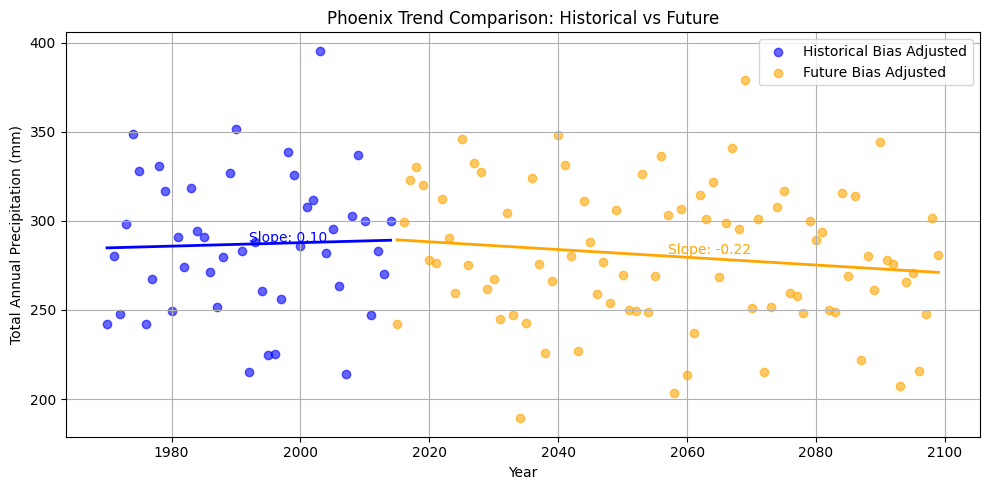

City: Boulder
Historical Slope: 0.6327, 95% CI: [-0.11066396  1.37609419]
Future Slope:     0.4919, 95% CI: [0.14439413 0.83945273]
Slopes may not be significantly different (CI overlap).


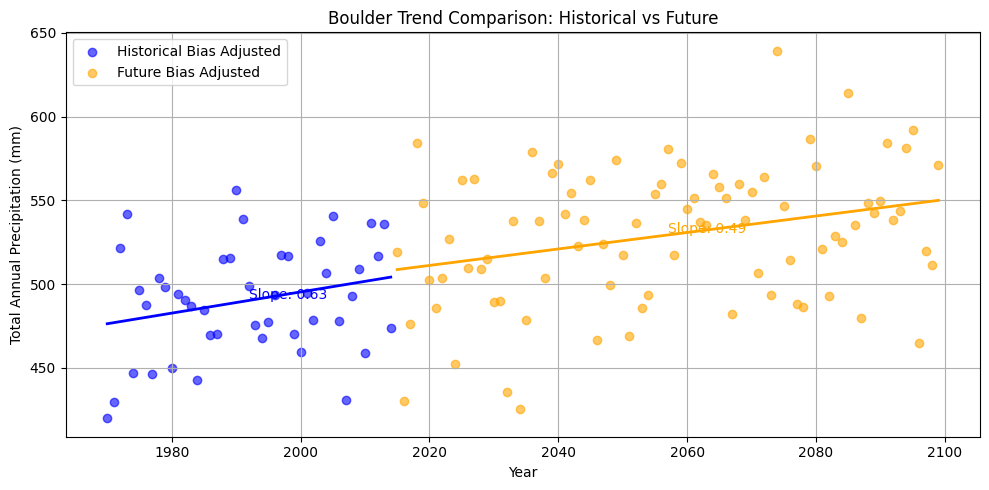

City: Ft Logan
Historical Slope: 0.0212, 95% CI: [-0.66889195  0.71135206]
Future Slope:     0.3508, 95% CI: [0.03370443 0.66798521]
Slopes may not be significantly different (CI overlap).


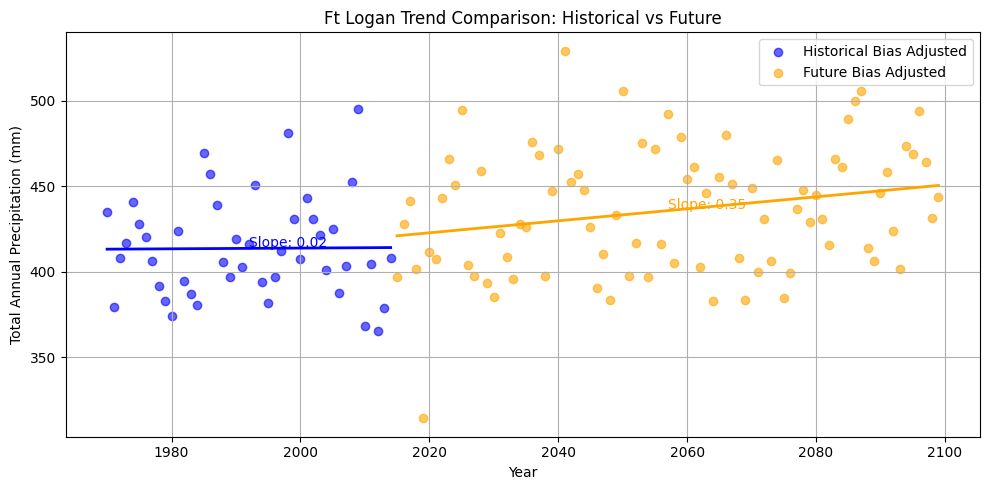

City: Sioux City
Historical Slope: -0.0495, 95% CI: [-1.06816819  0.96916154]
Future Slope:     0.1828, 95% CI: [-0.25356363  0.61923911]
Slopes may not be significantly different (CI overlap).


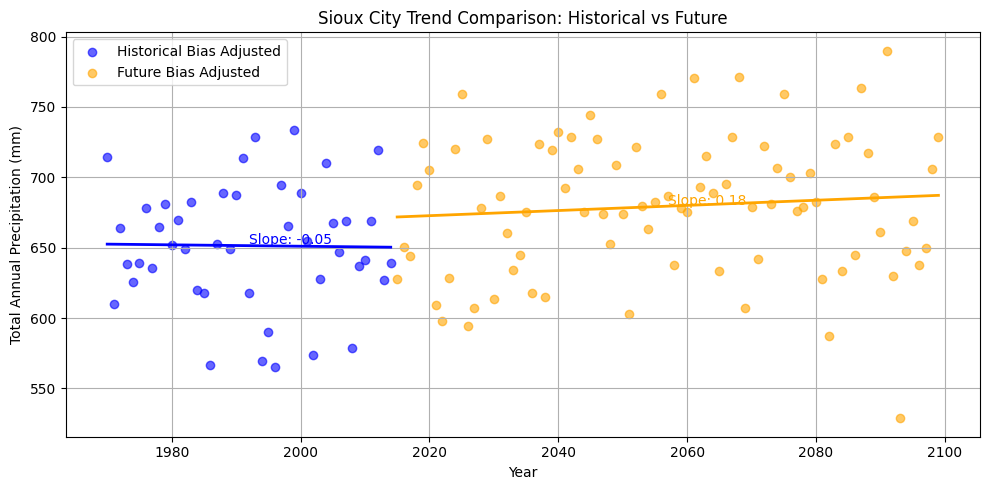

City: Yosemite
Historical Slope: -1.1299, 95% CI: [-2.67577653  0.41587669]
Future Slope:     0.2645, 95% CI: [-0.45679517  0.98588472]
Slopes may not be significantly different (CI overlap).


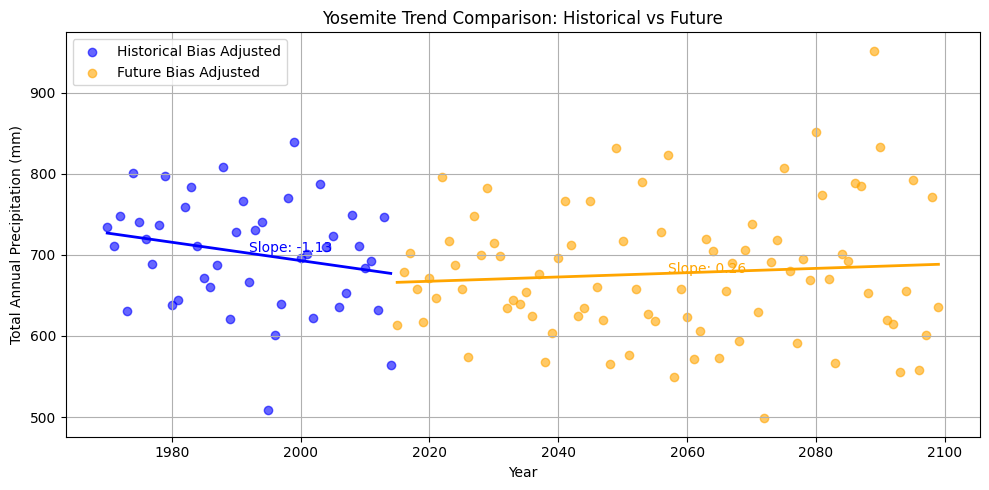

City: ARM site
Historical Slope: -0.6967, 95% CI: [-2.09020783  0.69670873]
Future Slope:     0.3635, 95% CI: [-0.12070262  0.8476594 ]
Slopes may not be significantly different (CI overlap).


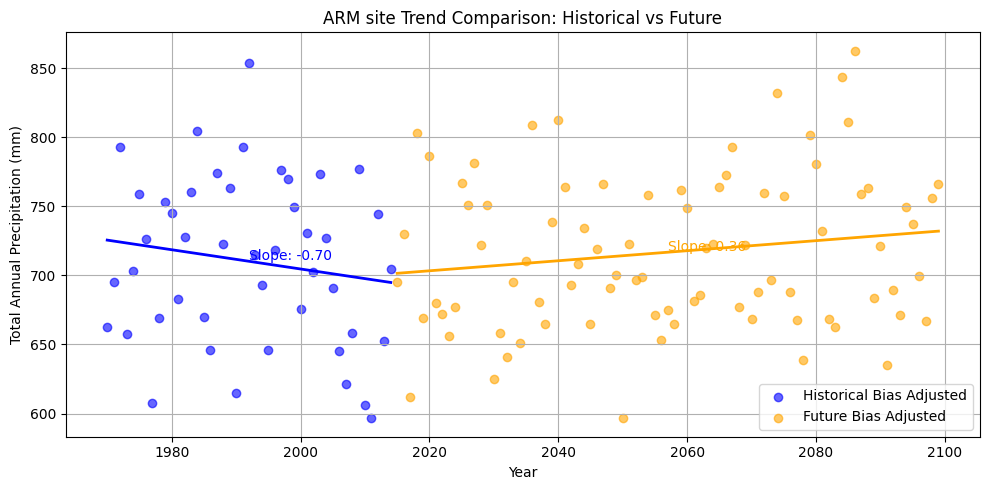

City: Seattle
Historical Slope: -1.2683, 95% CI: [-3.02102241  0.48446992]
Future Slope:     0.7460, 95% CI: [0.04182996 1.4502289 ]
Slopes may not be significantly different (CI overlap).


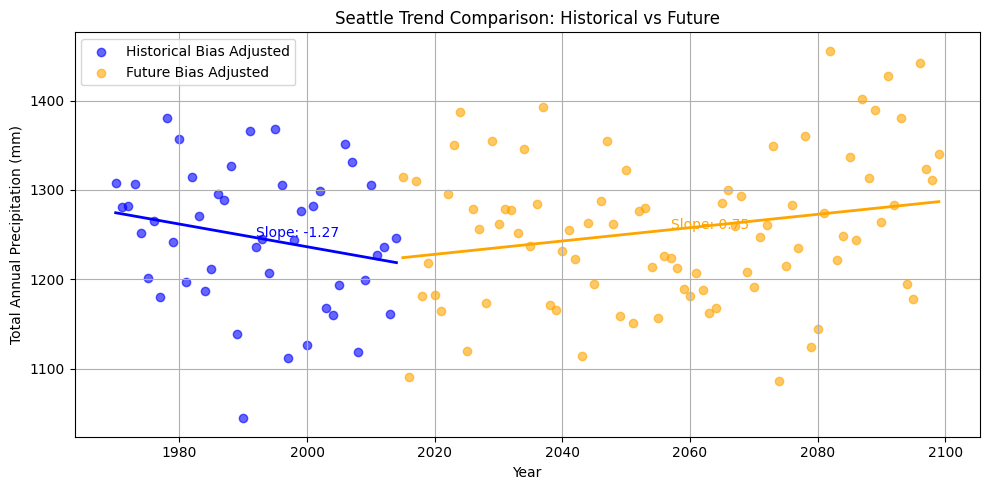

City: Pittsburgh
Historical Slope: 1.0928, 95% CI: [-0.0728397   2.25853885]
Future Slope:     1.3391, 95% CI: [0.8062541  1.87190415]
Slopes may not be significantly different (CI overlap).


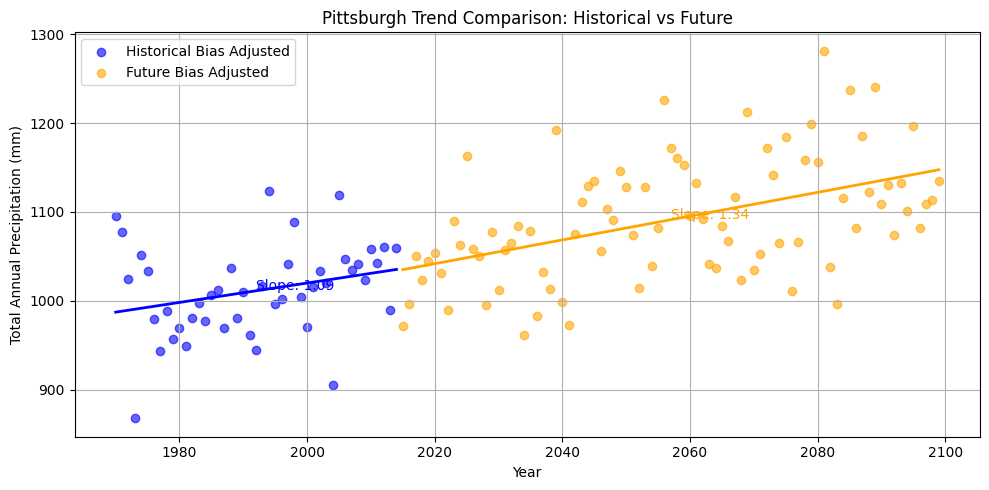

City: Orlando
Historical Slope: 0.7331, 95% CI: [-0.78501698  2.25127041]
Future Slope:     0.5963, 95% CI: [-0.04113444  1.23371894]
Slopes may not be significantly different (CI overlap).


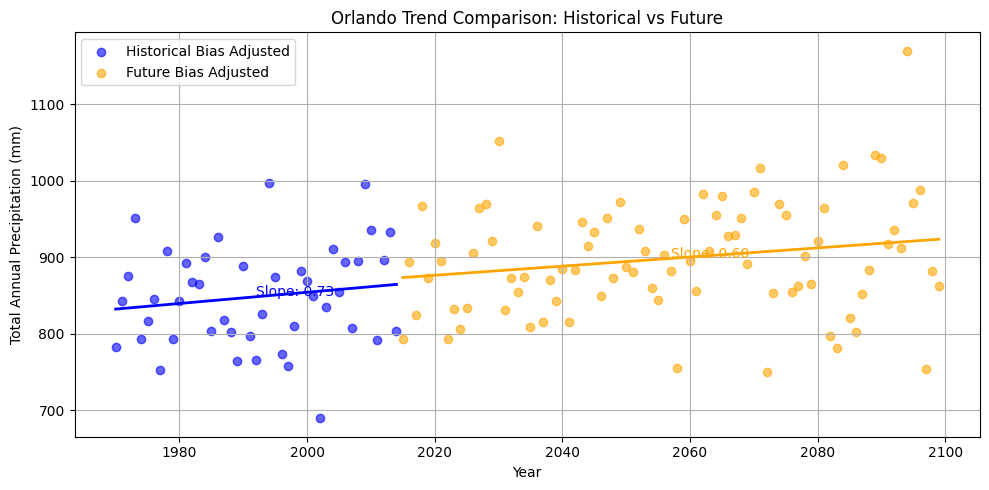

City: Birmingham
Historical Slope: 0.6083, 95% CI: [-0.97951828  2.19605936]
Future Slope:     0.9287, 95% CI: [0.29514973 1.56227313]
Slopes may not be significantly different (CI overlap).


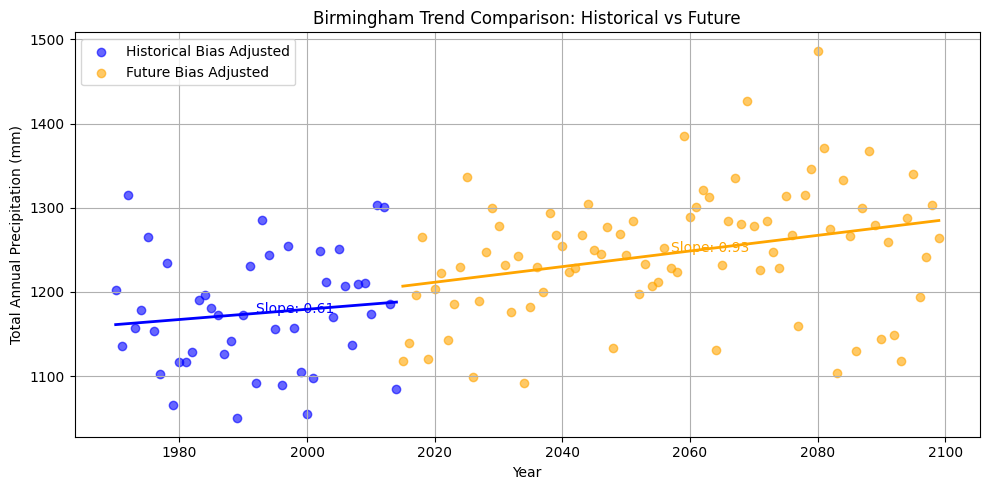

In [21]:

def get_trend(years, data):
    X = sm.add_constant(years)
    model = sm.OLS(data, X).fit()
    slope = model.params[1]
    ci = model.conf_int()[1]
    return slope, ci, model


def compare_trends(years1, p1, years2, p2):
    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"Historical Slope: {slope1:.4f}, 95% CI: {ci1}")
    print(f"Future Slope:     {slope2:.4f}, 95% CI: {ci2}")

    # Simple visual check of CI overlap
    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print("Slopes are significantly different (no CI overlap).")
    else:
        print("Slopes may not be significantly different (CI overlap).")

    return (slope1, ci1), (slope2, ci2)

def compare_trends_with_plot(years1, p1, years2, p2, title="Trend Comparison", ylabel="Precipitation (mm)"):
    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"Historical Slope: {slope1:.4f}, 95% CI: {ci1}")
    print(f"Future Slope:     {slope2:.4f}, 95% CI: {ci2}")

    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print("Slopes are significantly different (no CI overlap).")
    else:
        print("Slopes may not be significantly different (CI overlap).")

    # Plot
    plt.figure(figsize=(10, 5))

    # Historical data + fit
    plt.scatter(years1, p1, color='blue', label='Historical Bias Adjusted', alpha=0.6)
    X1 = sm.add_constant(years1)
    plt.plot(years1, model1.predict(X1), color='blue', linewidth=2)
    # Historical trend label
    mid_x1 = np.mean(years1)
    mid_y1 = model1.predict([1, mid_x1])
    plt.text(mid_x1, mid_y1 + 1, f"Slope: {slope1:.2f}", color='blue', fontsize=10)

    # # Confidence interval (bootstrapped linear CI using endpoints)
    # plt.fill_between(years1,
    #                  ci1[0] + (ci1[1] - ci1[0]) / (years1[-1] - years1[0]) * (years1 - years1[0]),
    #                  ci1[1] + (ci1[1] - ci1[0]) / (years1[-1] - years1[0]) * (years1 - years1[0]),
    #                  color='blue', alpha=0.2)

    # Future data + fit
    plt.scatter(years2, p2, color='orange', label='Future Bias Adjusted', alpha=0.6)
    X2 = sm.add_constant(years2)
    plt.plot(years2, model2.predict(X2), color='orange', linewidth=2)
    # Future trend label
    mid_x2 = np.mean(years2)
    mid_y2 = model2.predict([1, mid_x2])
    plt.text(mid_x2, mid_y2 + 1, f"Slope: {slope2:.2f}", color='orange', fontsize=10)

    # # CI for future
    # plt.fill_between(years2,
    #                  ci2[0] + (ci2[1] - ci2[0]) / (years2[-1] - years2[0]) * (years2 - years2[0]),
    #                  ci2[1] + (ci2[1] - ci2[0]) / (years2[-1] - years2[0]) * (years2 - years2[0]),
    #                  color='orange', alpha=0.2)

    plt.title(f"{title} Trend Comparison: Historical vs Future")
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return (slope1, ci1), (slope2, ci2)




# Replace with your real data
years = np.arange(1970, 2100)
annual_p = np.random.normal(loc=1000, scale=50, size=len(years))  # Fake placeholder

# Slice historical and future
hist_mask = (years >= 1970) & (years <= 2014)
fut_mask = (years >= 2015) & (years <= 2099)


for i in range(len(cities)):
    print(f"City: {list(cities.keys())[i]}")
    years_hist = years[hist_mask]
    years_fut = years[fut_mask]
    p_hist = annual_total_xt_local[i].mean(axis=1)
    p_fut = annual_total_future_xt_local[i].mean(axis=1)
    compare_trends_with_plot(years_hist, p_hist, years_fut, p_fut, title=list(cities.keys())[i], ylabel='Total Annual Precipitation (mm)')



## Ibicus (Simple Way)

In [ ]:
## prepare a function to calculate bias between trend of y and x
def calculate_trend_bias(y, x):
    """ 
    Calculate the bias between the trend of y and x.
    Parameters:
        y (np.ndarray): The observed data.
        x (np.ndarray): The model data.
        
    Returns:
        bias (float): The calculated bias.
    """
    y_trend = np.mean(y, axis=0)
    x_trend = np.mean(x, axis=0)
    
    bias = x_trend - y_trend
    
    return bias 

In [ ]:

interp_coords = []
ensemble_coords = valid_coords[2]
for coords in valid_coords:
    interp_coords.append(find_nearest_indices(ensemble_coords, coords))



# Initialize climate indices manager
climate_indices = ClimateIndices()

thresholds = climate_indices.get_indices()

future_x_ensemble_indices = {}
x_ensemble_indices = {}

# y_ensemble_indices = {}
future_xt_ensemble_indices = {}
future_loca_ensemble_indices = {}
future_QM_ensemble_indices = {}

counter = 0 
for model in models:
    model['future_time'] = np.array([np.datetime64(t) for t in model['future_time']])

    for label, (threshold, comparison) in thresholds.items():
        if callable(threshold):  # If function, apply it to y
            model[f'{label}_x'] = threshold(model['x_time_np'], model['x'])

            model[f'{label}_future_x'] = threshold(model['future_time'], model['future_x'])
            model[f'{label}_future_xt'] = threshold(model['future_time'], model['future_xt'])
            model[f'{label}_future_loca'] = threshold(model['future_time'], loca_future_all[counter])
            model[f'{label}_future_QM'] = threshold(model['future_time'], QM_future_all[counter])

            if label not in future_x_ensemble_indices:
                x_ensemble_indices[label] = model[f'{label}_x'][:, interp_coords[counter][0]]/len(models)
                future_x_ensemble_indices[label] = model[f'{label}_future_x'][:, interp_coords[counter][0]]/len(models)
                future_xt_ensemble_indices[label] = model[f'{label}_future_xt'][:, interp_coords[counter][0]]/len(models)
                future_loca_ensemble_indices[label] = model[f'{label}_future_loca'][:, interp_coords[counter][0]]/len(models)
                future_QM_ensemble_indices[label] = model[f'{label}_future_QM'][:, interp_coords[counter][0]]/len(models)
            else:
                x_ensemble_indices[label]+= model[f'{label}_x'][:, interp_coords[counter][0]]/len(models)
                future_x_ensemble_indices[label]+= model[f'{label}_future_x'][:, interp_coords[counter][0]]/len(models)
                future_xt_ensemble_indices[label]+= model[f'{label}_future_xt'][:, interp_coords[counter][0]]/len(models)
                future_loca_ensemble_indices[label]+= model[f'{label}_future_loca'][:, interp_coords[counter][0]]/len(models)
                future_QM_ensemble_indices[label]+= model[f'{label}_future_QM'][:, interp_coords[counter][0]]/len(models)
    counter+=1

In [ ]:
trend_bias_dict = {}

for label, (threshold, comparison) in thresholds.items():
    if callable(threshold):
        x_bias = calculate_trend_bias(x_ensemble_indices[label], future_x_ensemble_indices[label])

        xt_bias = calculate_trend_bias(x_ensemble_indices[label], future_xt_ensemble_indices[label])
        loca_bias = calculate_trend_bias(x_ensemble_indices[label], future_loca_ensemble_indices[label])
        QM_bias = calculate_trend_bias(x_ensemble_indices[label], future_QM_ensemble_indices[label])

        trend_bias_dict[label] = (x_bias, xt_bias, loca_bias, QM_bias)

In [ ]:
keys = ['SDII (Monthly)','CDD (Yearly)', 'CWD (Yearly)', "Rx1day", "Rx5day", "R10mm",  "R20mm", "R95pTOT", "R99pTOT"]
d = dict(filter(lambda item: item[0] in keys , trend_bias_dict.items()))



# Create a 2x2 subplot figure
fig, axes = plt.subplots(1, 1, figsize=(16, 6), sharey=True)


ref_label = models[0]['config']['ref']
method_names = ['dCLIMAD-BA(MM)', 'LOCA(MM)', 'QM(MM)'] 
# Call the function for each dataset
plot_violin_bias(axes, d, "Bias(%)", f"Trend Bias(%) for Different Precipitation Indices; Reference: {ref_label}",  method_names=method_names, remove_outlier=True)

# plot_violin_bias(axes[1], d4, "Bias(%)", "Day Bias(%) for Different Precipitation Indices",  method_names=method_names, remove_outlier=True)
# fig.suptitle(f'Ensemble-Livneh', fontsize=20, fontweight="bold", y=1.02)


plt.tight_layout()
plt.savefig(f'{save_path}violin_Pindices.png')

plt.show()